# Boston Housing Data

The dataset being considered has 506 rows and 14 columns. The basis to consider this dataset is to understand how the cost fo a house in the area of Boston can be predicted using 13 various variables. All the variables given in the dataset have various effects on the prediction variable i.e., Median Value of the house. So, we are suppose to determine the most important values that have an impact on price and determine the price. 

In [1]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
data = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/projects/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Delving into the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


By looking at the above information we see that there are no null values in the data. 

In [4]:
#Statistical measures of the variables.
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

In exploratory data analysis we see how the data we have is related to predictor variable by analysing which variables have a maximum effect on the median value of the house. 

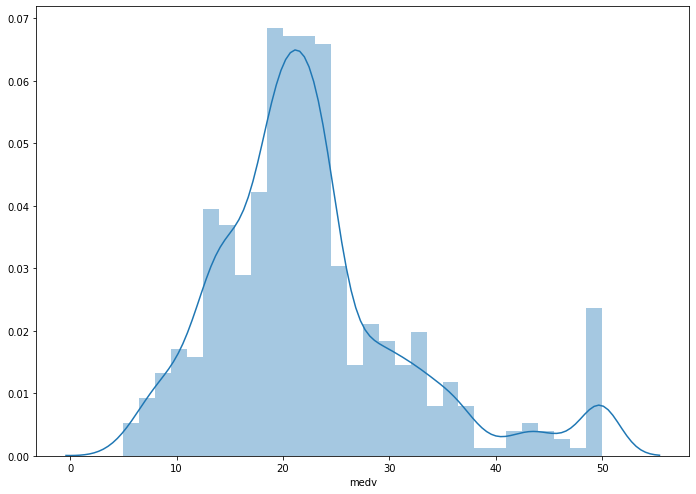

In [5]:
plt.figure(figsize=(11.7,8.27))
sns.distplot(data['medv'], bins=30)
plt.show()

The dependent variable as seen from the abovee graph is normally distributed with a few outliers. 

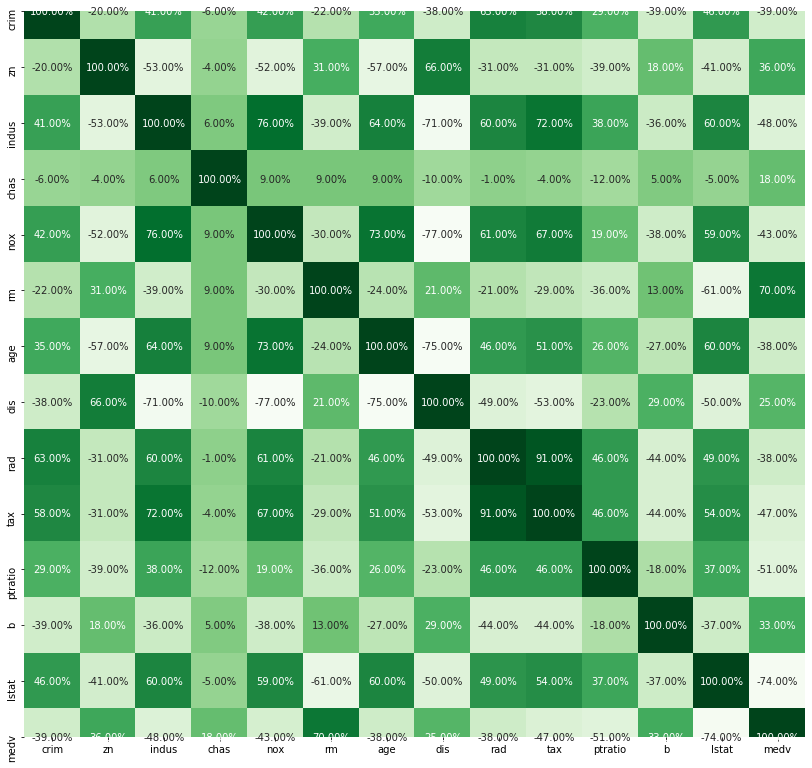

In [6]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr().round(2), cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')
plt.show()

As we see that the correlation matrix shows the there exists a strong negative correlation between lstat and the dependent variable medv. Likewise, there exists a strong positive relationship between the rm value and medv. The ptratio is slightly over -0.50 which also depicts that there is a relation betwwen them. So, we are considering rm, ptraio, and lstat for our analysis. 

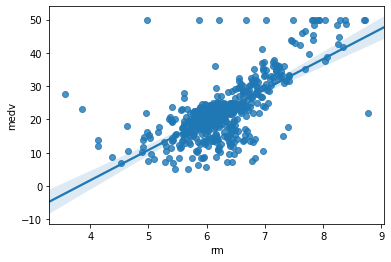

In [7]:
sns.regplot( x = "rm", y = "medv", data = data)

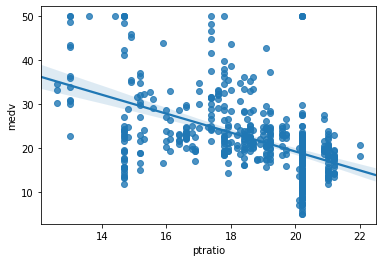

In [8]:
sns.regplot( x = "ptratio", y = "medv", data = data)

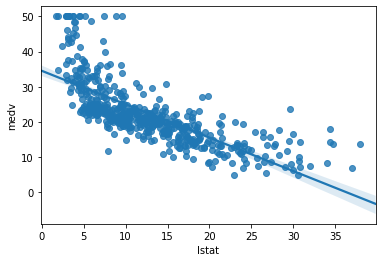

In [9]:
sns.regplot( x = "lstat", y = "medv", data = data)

The above graphs show how the considered values are showing a strong correlation. 

In [10]:
#Making a copy of the data. 
data_new = data.copy(deep=True)
data_new.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
#Droping the unused values. 
data_new.drop(['crim', 'zn', 'indus','chas','nox','age','dis','rad','tax','b'], axis = 1)

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


### Splitting the Data 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Creating the dependen and independent values. 
x = data_new[['rm', 'ptratio','lstat']]
y = data_new['medv'].values.reshape(-1,1)

In [14]:
#Shape of the values.
x.shape, y.shape

((506, 3), (506, 1))

In [15]:
#Splitting the data. 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 12)

In [16]:
#Checking the length after splitting the data. 
len(x_train), len(x_test), len(y_train), len(y_test)

(379, 127, 379, 127)

In [17]:
#Shape of the train and test data. 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 3), (127, 3), (379, 1), (127, 1))

### Model Fitting

In [18]:
from sklearn. linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
#Fitting the model into the training data
model.fit(x_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Model intercept value.
model.intercept_

19.166210768586897

In [22]:
#Model Coefficient values. 
model.coef_

array([ 4.09350286, -0.7997609 , -0.6006877 ])

### Model Prediction

In [23]:
#Prediciting the test variable.
predicted_variable = model.predict(x_test)

In [24]:
#Printing the predcited values.
predicted_variable

array([24.78640165, 17.28824799,  9.2053756 , 26.66382789, 27.9638329 ,
       21.26820997, 21.16216948, 37.44961229, 29.90843113, 25.75826161,
       27.16535744, 21.87600805, 23.24676919, 24.15343614, 33.01614473,
       38.82411255, 17.86777679, 28.17078053, 21.21786557, 23.82957899,
       27.8716319 , 13.17624387, 23.95739196, 16.1688682 , 27.70338151,
       17.39639108, 22.86094919, 15.48358303, 25.35506629, 36.2819816 ,
       25.60197618, 27.58806739, 16.51192509, 30.75175831, 41.32364692,
       16.77015511, 23.63657796, 38.10194636, 17.43630981, 25.72456301,
       17.11496515, 26.61331426, 22.27737754, 32.09398875, 17.66144814,
       17.53713461, 19.95816301, 13.31110785, 37.64456522, 24.72074295,
       29.61934704, 24.00045343, 17.48002673, 25.46434686, 17.02586566,
       17.95595687, 22.32163503, 21.67967962, 19.17811942, 19.21632413,
       20.23215813, 33.11319554, 20.73504309, 18.54428176, 21.5538823 ,
       24.35716092, 27.17542385, 17.13442388, 22.282897  , 38.26

In [25]:
df = pd.DataFrame(data = [predicted_variable, y_test])
df.T

,0,1
0,24.7864,[20.7]
1,17.2882,[12.7]
2,9.20538,[8.5]
3,26.6638,[25.1]
4,27.9638,[28.2]
...,...,...
122,26.4107,[24.4]
123,34.3583,[46.7]
124,27.9477,[29.0]
125,28.164,[24.1]


### Measuring the model Accuracy 

In [26]:
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [27]:
#Checking the performance of the model.
MSE = mean_squared_error(y_test, predicted_variable)
MAE = mean_absolute_error(y_test, predicted_variable)
r2 = r2_score(y_test,predicted_variable)
rmse = (np.sqrt(mean_squared_error(y_test,predicted_variable)))

In [28]:
print('MSE score is {}'.format(MSE))

MSE score is 24.606818998870796


In [29]:
print('MAE score is {}'.format(MAE))

MAE score is 3.6175096317163438


In [30]:
print('R2 score is {}'.format(r2))

R2 score is 0.7201789595458659


In [31]:
print('RMSE is {}'.format(rmse))

RMSE is 4.960526080857836


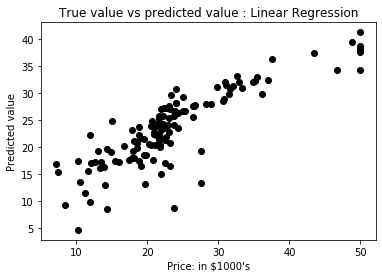

In [32]:
# Plotting Scatter graph to show the prediction results - 'ytrue' value vs 'y_pred' value 
plt.scatter(y_test, predicted_variable, c = 'black') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

### Linear Regression with Cross Validation 

Cross validation is a technique wherein we are to understand how accurately a predictive model will perform in practice. In train test split we are taking only the train part of the data randomly and the test part randomly as well. Here, there can be an issue where the randomly choosen test data may contain something that is not present in the train data. So, that may lead to a poor model. Cross validation is used to over come this problem by randomly choosing a part of the data to train and the rest to test. Depending on the number specified, the data is split into parts and trained as many times. The accuracy for each of the records is calculated with varied test and training data. This gives an independent accuracy score to each test and train split.

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [34]:
#Printing the scores for cross validation.
scores = cross_val_score(model, x_train, y_train, cv = 10)
print(scores)

[0.50866993 0.66433578 0.70745456 0.42410903 0.73417721 0.72214086
 0.62266765 0.75963739 0.57975239 0.63289655]


The accuracy values above show how the result is going to be obtained with various parts of the data as test and train data. 

In [35]:
print("Accuracy with Cross Validation is:",scores.mean() * 100)

Accuracy with Cross Validation is: 63.55841339919397


The mean accuracy score is 63.5% with the data given